In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'bWJ0J3sV2M1yplR5NgRjraUSg'
CONSUMER_SECRET = 'GGBuy7N0ncLpwieEU3JFVHn2KmIbbbADu04PHlxnvQ0gGtm36Z'

# Access:
ACCESS_TOKEN  = '709071172839714818-Cs1Tiis4byNuib9GDcJUNWDLhCvSKJv'
ACCESS_SECRET = 'lrEgfZJWZIGljD7E2nqmadfNIdj8DHO4QSc8hKtgWDXbD'

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) #authenticate giving our consumer keys
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET) #give access token, can get data but has limit(7500?)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

## Exercise 1

Consider the tweets published in your own timeline (http://tweepy.readthedocs.io/en/v3.5.0/getting_started.html#hello-tweepy) and analyze their sentiments. This will help you capture with what content you get in touch with. Is it more positive-, neutral-, or negative-oriented?

In [4]:
extractor = twitter_setup()

user = extractor.get_user('racheldyap')
print(user.screen_name)
print(user.id)

racheldyap
709071172839714818


In [5]:
public_tweets = extractor.home_timeline('709071172839714818', count=300)

for tweet in public_tweets[:8]:
    print(tweet.text)
    print()

Saudis 'shoot down' Houthi missile close to capital https://t.co/tjpjM9Yj3R

6 conspiracy theories people are convinced are true https://t.co/YlLA7CF706

OVP taps 2 gov’t hospitals in MM #BeFullyInformed https://t.co/YLDwrMwxqO

PHL among 5 most dangerous countries for journalists in 2017 —int’l media freedom group https://t.co/X5tTnCDWsf

How can we keep lost loved ones alive in our mind? Your answers https://t.co/jijQb2ULTo

Facebook said it would start demoting posts that exploit its algorithm by fishing for user engagement… https://t.co/oIgUynLfaS

Anyone else as excited for #Oceans8? https://t.co/layR5k4ajS

Adopt an olive tree and support local farmers and producers who keep time-honored, olive oil making methods alive.… https://t.co/9EvdORETYY



In [6]:
print(dir(public_tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [7]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in public_tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,Saudis 'shoot down' Houthi missile close to ca...
1,6 conspiracy theories people are convinced are...
2,OVP taps 2 gov’t hospitals in MM #BeFullyInfor...
3,PHL among 5 most dangerous countries for journ...
4,How can we keep lost loved ones alive in our m...
5,Facebook said it would start demoting posts th...
6,Anyone else as excited for #Oceans8? https://t...
7,Adopt an olive tree and support local farmers ...
8,Climate change driving record snows in Alaskan...
9,The Amtrak train was going more than twice the...


In [8]:
print(public_tweets[4].source_url)
print(public_tweets[4].geo)

http://www.socialflow.com
None


In [9]:
data['len'] = np.array([len(tweet.text) for tweet in public_tweets])
data['ID'] = np.array([tweet.id for tweet in public_tweets])
data['Date'] = np.array([tweet.created_at for tweet in public_tweets])
data['Source'] = np.array([tweet.source for tweet in public_tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in public_tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in public_tweets])

In [10]:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,Saudis 'shoot down' Houthi missile close to ca...,75,943099005130690560,2017-12-19 12:41:39,SocialFlow,0,0
1,6 conspiracy theories people are convinced are...,75,943098907856424960,2017-12-19 12:41:16,TweetDeck,0,0
2,OVP taps 2 gov’t hospitals in MM #BeFullyInfor...,73,943098845021523973,2017-12-19 12:41:01,Sprout Social,0,0
3,PHL among 5 most dangerous countries for journ...,111,943098841397567488,2017-12-19 12:41:00,TweetDeck,2,0
4,How can we keep lost loved ones alive in our m...,87,943098669280256000,2017-12-19 12:40:19,SocialFlow,5,0
5,Facebook said it would start demoting posts th...,126,943098621016313856,2017-12-19 12:40:07,SocialFlow,23,20
6,Anyone else as excited for #Oceans8? https://t...,60,943098616310304768,2017-12-19 12:40:06,Twitter Web Client,1,0
7,Adopt an olive tree and support local farmers ...,139,943098610606133248,2017-12-19 12:40:05,Buffer,2,0
8,Climate change driving record snows in Alaskan...,111,943098609272270848,2017-12-19 12:40:05,trueAnthem,8,7
9,The Amtrak train was going more than twice the...,132,943098604583047168,2017-12-19 12:40:03,SocialFlow,15,15


#### Average

In [11]:
mean = np.mean(data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 106.46231155778895


#### Popularity

In [12]:
fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max)) 
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
President Trump's approval rating hits 35%, his worst mark yet in CNN polling by one point. 

His approval ratings… https://t.co/ef8pvI6ctp
Number of likes: 687
139 characters.

The tweet with more retweets is: 
RT @BabyAnimalsPic: Why is this the cutest thing I've ever seen in my life https://t.co/phqDmS4Jus
Number of retweets: 4139
98 characters.



#### Time Series

In [13]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

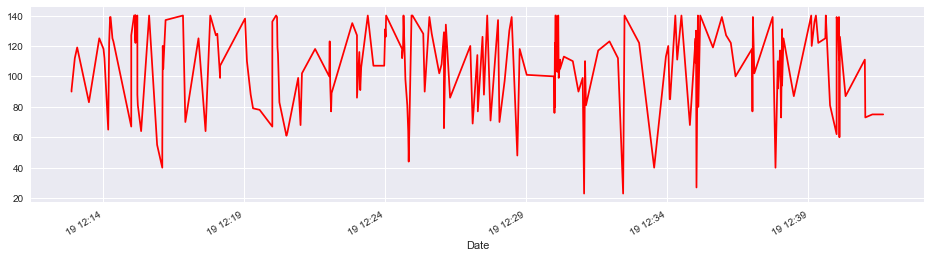

In [14]:
tlen.plot(figsize=(16,4), color='r');

    ^^ plots one data point(tweet) per date time

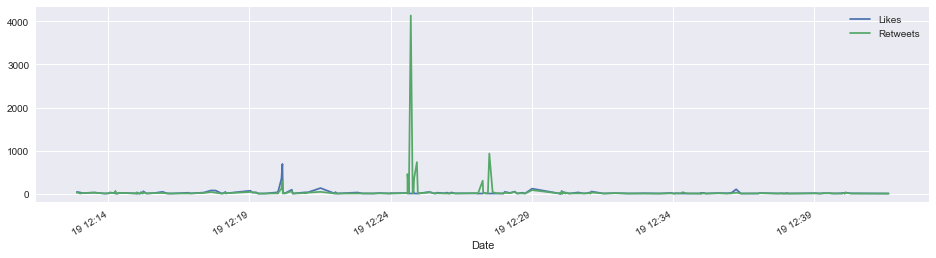

In [15]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

#### Pie Chart - Display Sources

In [16]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* SocialFlow
* TweetDeck
* Sprout Social
* Twitter Web Client
* Buffer
* trueAnthem
* Sprinklr
* Business Insider
* Media Studio
* Echobox Social
* dlvr.it
* Hootsuite
* Mobile Web (M2)
* Twitter for Android
* Meet Edgar
* Malorie
* RoundTeam
* Spredfast
* Spredfast app
* Falcon Social Media Management 
* Twitter for iPhone
* OnSugar.com
* Vox Media
* SnappyTV.com


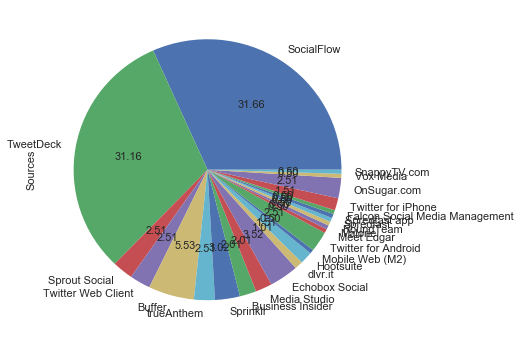

In [17]:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

#### Sentiment Analysis

In [18]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer #Only necessary if you want to override the Patteranalyzer (default)

import re

def clean_tweet(tweet): # gets rid of urls, @, substitute it with blank space
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet): # pass the clean_tweet, then analyze text
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [19]:
data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Saudis 'shoot down' Houthi missile close to ca...,75,943099005130690560,2017-12-19 12:41:39,SocialFlow,0,0,-1
1,6 conspiracy theories people are convinced are...,75,943098907856424960,2017-12-19 12:41:16,TweetDeck,0,0,1
2,OVP taps 2 gov’t hospitals in MM #BeFullyInfor...,73,943098845021523973,2017-12-19 12:41:01,Sprout Social,0,0,0
3,PHL among 5 most dangerous countries for journ...,111,943098841397567488,2017-12-19 12:41:00,TweetDeck,2,0,-1
4,How can we keep lost loved ones alive in our m...,87,943098669280256000,2017-12-19 12:40:19,SocialFlow,5,0,1
5,Facebook said it would start demoting posts th...,126,943098621016313856,2017-12-19 12:40:07,SocialFlow,23,20,0
6,Anyone else as excited for #Oceans8? https://t...,60,943098616310304768,2017-12-19 12:40:06,Twitter Web Client,1,0,1
7,Adopt an olive tree and support local farmers ...,139,943098610606133248,2017-12-19 12:40:05,Buffer,2,0,1
8,Climate change driving record snows in Alaskan...,111,943098609272270848,2017-12-19 12:40:05,trueAnthem,8,7,0
9,The Amtrak train was going more than twice the...,132,943098604583047168,2017-12-19 12:40:03,SocialFlow,15,15,1


#### Summary of Results

In [20]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [21]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 38.19095477386934%
Percentage of neutral tweets: 43.21608040201005%
Percentage of negative tweets: 18.592964824120603%


    Findings: 
        Most of the feeds on my public profile have neutral feelings

## Exercise 2

Consider the last 100 tweets that contain a keyword of your interest (http://docs.tweepy.org/en/latest/api.html#API.search) and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments over the keyword distributed?

In [22]:
extractor = twitter_setup()

In [23]:
tweets = extractor.search(q="travel")
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 15.

5 recent tweets:

RT @PakistanNature: Animals of Pakistan. This beautiful being, Marmot, was spotted at Deosai National Park, Gilgit Baltistan, Pakistan by M…

The luxury hotel in a Norwegian cabin https://t.co/D55HbybcnR #Travel #Life

The luxury hotel in a Norwegian cabin https://t.co/noIb1SDGlO

RT @mnabih123: ساعدوني الصورة دي يتعملها شير و تلف العالم ... دي مصر الحضارة بعدستي و بمزاجي #Egypt #Cairo #Travel https://t.co/xsHbIslzW6

Hiking UK – 22 Best day hikes in the UK by travel bloggers https://t.co/NZIGQNMUgi https://t.co/o4E9R8VnK1



In [24]:
data2 = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
# We display the first 10 elements of the dataframe:
#display(data2.head(10))

In [25]:
data2['len'] = np.array([len(tweet.text) for tweet in tweets])
data2['ID'] = np.array([tweet.id for tweet in tweets])
data2['Date'] = np.array([tweet.created_at for tweet in tweets])
data2['Source'] = np.array([tweet.source for tweet in tweets])
data2['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data2['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [26]:
#display(data2.head(10))

In [27]:
max = np.max(data['len'])
min = np.min(data['len'])
mean = np.mean(data['len'])

print("The minimum length of tweets: {}".format(min))
print("The average length of tweets: {}".format(mean))
print("The maximum length of tweets: {}".format(max))

The minimum length of tweets: 23
The average length of tweets: 106.46231155778895
The maximum length of tweets: 140


In [28]:
fav_max = np.max(data2['Likes'])
rt_max  = np.max(data2['RTs'])

fav = data2[data2.Likes == fav_max].index[0]
rt  = data2[data2.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data2['Tweets'][fav]))
print("Number of likes: {}".format(fav_max)) 
print("{} characters.\n".format(data2['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data2['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data2['len'][rt]))

The tweet with more likes is: 
RT @PakistanNature: Animals of Pakistan. This beautiful being, Marmot, was spotted at Deosai National Park, Gilgit Baltistan, Pakistan by M…
Number of likes: 0
140 characters.

The tweet with more retweets is: 
RT @bbusa617: BREAKING: Anti-Trump 9th Circuit Judge RESIGNS IN DISGRACE! https://t.co/B6RFJ285E3

Just Breaking 9th Circuit District Judge…
Number of retweets: 1314
140 characters.



In [29]:
data2['SA'] = np.array([ analyze_sentiment(tweet) for tweet in data2['Tweets'] ])

# We display the updated dataframe with the new column:
display(data2.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,RT @PakistanNature: Animals of Pakistan. This ...,140,943098984159170562,2017-12-19 12:41:34,Twitter for Android,0,26,1
1,The luxury hotel in a Norwegian cabin https://...,75,943098982028505088,2017-12-19 12:41:33,IFTTT,0,0,0
2,The luxury hotel in a Norwegian cabin https://...,61,943098981600645120,2017-12-19 12:41:33,IFTTT,0,0,0
3,RT @mnabih123: ساعدوني الصورة دي يتعملها شير و...,138,943098979750998016,2017-12-19 12:41:33,Twitter for Android,0,272,0
4,Hiking UK – 22 Best day hikes in the UK by tra...,106,943098976483627009,2017-12-19 12:41:32,WordPress.com,0,0,1
5,@PDFGirl @SenBobCorker I travel to the Bean St...,140,943098974642298880,2017-12-19 12:41:32,Twitter for iPhone,0,0,0
6,RT @bbusa617: BREAKING: Anti-Trump 9th Circuit...,140,943098974105489408,2017-12-19 12:41:32,Twitter for iPhone,0,1314,0
7,RT @PakistanNature: Lowari tunnel has recently...,139,943098970674429952,2017-12-19 12:41:31,Twitter for iPhone,0,44,0
8,RT @TravelWell4Less: Beachfront resort in para...,140,943098967117541376,2017-12-19 12:41:30,Our Scheduling App,0,150,1
9,RT @HerdadeFozdaRep: Mariza - Rosa Branca \nht...,98,943098964886220801,2017-12-19 12:41:29,Twitter for Android,0,1,0


In [30]:
pos_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data2['Tweets']) if data2['SA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data2['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data2['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data2['Tweets'])))

Percentage of positive tweets: 20.0%
Percentage of neutral tweets: 73.33333333333333%
Percentage of negative tweets: 6.666666666666667%


    Findings:

    Because its almost the holidays, most people generally have a positive feeling about the word "travel" but its also quite surprising how there are some with negative sentiments, which is worth looking into to.

## Exercise 3

Consider the last 300 tweets that contain a location of your interest and analyze the lenght of their tweets, and the number of likes and retweets, and their sentiments. How are the sentiments of the users in that location?

In [31]:
#to handle pagination
#http://docs.tweepy.org/en/v3.5.0/cursor_tutorial.html
#for status in tweepy.Cursor(extractor.user_timeline).items():
    #process_status(status)

In [32]:
tweets = extractor.search(q="Christmas", count=500)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

5 recent tweets:

RT @AlyssaFarin: rt this lucky 1k's para bigyan ka nila ninong at ninang ng 1k sa Christmas. https://t.co/vDmfRYwxy0

RT @MezzoMikiD: TDLディズニー・クリスマス・ストーリーズ☆
https://t.co/tn3sjftJil https://t.co/8ciYskusXr

RT @RichardBarrow: Christmas in Bangkok: Giant Santa Claus in front of Central Embassy. Easy access via BTS Ploenchit #Bangkok #Thailand ht…

RT @Keefosabe: Bitch , Christmas is literally next week https://t.co/kVIPkzv4WQ

RT @Hoxication1006: 171219 Christmas Party 
#몬스타엑스 #주헌 #JOOHEON
@OfficialMonstaX https://t.co/Njb9n4S2Jc



^^ only get 100 tweets?

In [33]:
data3 = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=["Tweets"])

In [34]:
# getting GEO ID for Philippines
places = extractor.geo_search(query="Philippines", granularity="country")
place_id = places[0].id
print("Philippines id is:", place_id)

Philippines id is: fb151ef38fa2ac0d


In [35]:
searchQuery = 'place:fb151ef38fa2ac0d #duterte or # du30'
maxTweets = 300
tweetsPerQry = 100


    Philippines
    Latitude:14.650991914° 39' 3.57'' N
    Longitude:121.0269467121° 1' 37.01'' E


In [36]:
import json
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener

file = open("C:\\Output.csv", "w")
file.write("X,Y\n")

data_list = []
count = 0

class listener(StreamListener):

    def on_data(self, data):
        global count

        #How many tweets you want to find, could change to time based
        if count <= 2000:
            json_data = json.loads(data)

            coords = json_data["coordinates"]
            if coords is not None:
               print (coords["coordinates"])
               lon = coords["coordinates"][0]
               lat = coords["coordinates"][1]

               data_list.append(json_data)

               file.write(str(lon) + ",")
               file.write(str(lat) + "\n")

               count += 1
            return True
        else:
            file.close()
            return False

    def on_error(self, status):
        print(status)

#What you want to search for here
twitterStream.filter(track=["Du30"])

NameError: name 'twitterStream' is not defined

In [38]:
twitter_stream = tweepy.Stream(extractor, MyStreamListener())
twitter_stream.filter(track=["#duterte", "#du30", "#dutertenation", "#digong", "#PresidentDuterte", "#PresidentDu30"])
twitter_stream.filer(locations=[-122.75,36.8,-121.75,37.8])

NameError: name 'MyStreamListener' is not defined

In [ ]:
data3['location'] = np.array([tweet.geo for tweet in tweets])
data3['coordinates'] = np.array([tweet.coordinates for tweet in tweets])
data3['place'] = np.array([tweet.place for tweet in tweets])
data3['ID'] = np.array([tweet.id for tweet in tweets])
data3['Date'] = np.array([tweet.created_at for tweet in tweets])
data3['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data3['RTs'] = np.array([tweet.retweet_count for tweet in tweets])
data3.head()

    ^^I could not find the right function/code to do this. What is the difference between the way we do it in calss vs the StreamListener? 

## Exercise 4

When you mention another user (http://docs.tweepy.org/en/latest/api.html#API.mentions_timeline), with which sentiments do you do it?

In [ ]:
#API.mentions_timeline([since_id][, max_id][, count])
#Returns the 20 most recent mentions, including retweets.

In [ ]:
status = extractor.get_status(942535103099502592)
print(status)

In [ ]:
tweet_mentions = extractor.mentions_timeline(['942535103099502592',200]) 

    ^^Not sure also how to do this, because I have no tweets/retweets and thus no mentions. I am not sure, is this only applicable to my own timeline/profile? Because I have made no mentions

### Exercise 5

In [ ]:
user1 = extractor.user_timeline(screen_name='kayla_itsines', count=200)
user2 = extractor.user_timeline(screen_name='mysweatlife_',count=200)

In [ ]:
kayla = pd.DataFrame(data=[tweet.text for tweet in user1], columns=["Tweets"])
kayla['len'] = np.array([len(tweet.text) for tweet in user1])
kayla['Likes'] = np.array([tweet.favorite_count for tweet in user1])
kayla['RTs'] = np.array([tweet.retweet_count for tweet in user1])
kayla['Date'] = np.array([tweet.created_at for tweet in user1])

kelsey = pd.DataFrame(data=[tweet.text for tweet in user2], columns=["Tweets"])
kelsey['len'] = np.array([len(tweet.text) for tweet in user2])
kelsey['Likes'] = np.array([tweet.favorite_count for tweet in user2])
kelsey['RTs'] = np.array([tweet.retweet_count for tweet in user2])
kelsey['Date'] = np.array([tweet.created_at for tweet in user2])

In [ ]:
display(kayla.head(5))

In [ ]:
display(kelsey.head(5))

In [ ]:
# We extract the tweet with more FAVs and more RTs:
fav_max_1 = np.max(kayla['Likes'])
rt_max_1  = np.max(kayla['RTs'])

fav_max_2 = np.max(kelsey['Likes'])
rt_max_2  = np.max(kelsey['RTs'])

    #gives index based on filtered max in specified column
fav1 = kayla[kayla.Likes == fav_max_1].index[0] 
rt1 = kayla[kayla.RTs == rt_max_1].index[0]

fav2 = kelsey[kelsey.Likes == fav_max_2].index[0]
rt2 = kelsey[kelsey.RTs == rt_max_2].index[0]

# Max FAVs:
print("The tweet with more likes for Kayla is: \n{}".format(kayla['Tweets'][fav1]))
print("Number of likes: {}".format(fav_max_1)) 
print("{} characters.\n".format(kayla['len'][fav1]))

print("The tweet with more likes for Kelsey is: \n{}".format(kelsey['Tweets'][fav2]))
print("Number of likes: {}".format(fav_max_2)) 
print("{} characters.\n".format(kelsey['len'][fav2]))

# Max RTs:
print("The tweet with more retweets for Kayla is: \n{}".format(kayla['Tweets'][rt1]))
print("Number of retweets: {}".format(rt_max_1))
print("{} characters.\n".format(kayla['len'][rt1]))

print("The tweet with more retweets for Kelsey is: \n{}".format(kelsey['Tweets'][rt2]))
print("Number of retweets: {}".format(rt_max_2)) 
print("{} characters.\n".format(kelsey['len'][rt2]))

In [ ]:
tlen_k1 = pd.Series(data=kayla['len'].values, index=kayla['Date'])
tfav_k1 = pd.Series(data=kayla['Likes'].values, index=kayla['Date'])
tret_k1 = pd.Series(data=kayla['RTs'].values, index=kayla['Date'])

In [ ]:
tlen_k2 = pd.Series(data=kelsey['len'].values, index=kelsey['Date'])
tfav_k2 = pd.Series(data=kelsey['Likes'].values, index=kelsey['Date'])
tret_k2 = pd.Series(data=kelsey['RTs'].values, index=kelsey['Date'])

In [ ]:
tlen_k1.plot(figsize=(16,4), color='r');
tlen_k2.plot(figsize=(16,4), color='b');

    The TS for both users do not seem to be similar at all

In [ ]:
tfav_k1.plot(figsize=(16,4), label="Likes", legend=True)
tret_k1.plot(figsize=(16,4), label="Retweets", legend=True);

In [ ]:
tfav_k2.plot(figsize=(16,4), label="Likes", legend=True)
tret_k2.plot(figsize=(16,4), label="Retweets", legend=True);

Based on above, we can see that for user2 (kelsey) she does not get enough retweets despite the high likes she gets, unlike for user1 (kayla_, the normal observation is typically the more the tweet is liked, the higher the retweets

In [ ]:
# sentiment analysis
kayla['SA'] = np.array([ analyze_sentiment(tweet) for tweet in kayla['Tweets'] ])
kelsey['SA'] = np.array([ analyze_sentiment(tweet) for tweet in kelsey['Tweets'] ])

In [ ]:
pos_tweets_k1 = [ tweet for index, tweet in enumerate(kayla['Tweets']) if kayla['SA'][index] > 0]
neu_tweets_k1 = [ tweet for index, tweet in enumerate(kayla['Tweets']) if kayla['SA'][index] == 0]
neg_tweets_k1 = [ tweet for index, tweet in enumerate(kayla['Tweets']) if kayla['SA'][index] < 0]

pos_tweets_k2 = [ tweet for index, tweet in enumerate(kelsey['Tweets']) if kelsey['SA'][index] > 0]
neu_tweets_k2 = [ tweet for index, tweet in enumerate(kelsey['Tweets']) if kelsey['SA'][index] == 0]
neg_tweets_k2 = [ tweet for index, tweet in enumerate(kelsey['Tweets']) if kelsey['SA'][index] < 0]

In [ ]:
print("For User1 (kayla):")
print("Percentage of positive tweets: {}%".format(len(pos_tweets_k1)*100/len(kayla['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets_k1)*100/len(kayla['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets_k1)*100/len(kayla['Tweets'])))


print("\nFor User2 (kelsey):")
print("Percentage of positive tweets: {}%".format(len(pos_tweets_k2)*100/len(kelsey['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets_k2)*100/len(kelsey['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets_k2)*100/len(kelsey['Tweets'])))

    Findings:
        Considering the RTs and Likes, it would have been assumed the user1 would get more + sentiments and user2 more neutral.
        However based on the sentiment analyzers, user2 gets more + tweets than user1. 

## Exercise 6

Repeat exercise 5 with two users you consider very different (e.g., Donald Trump and Hillary Clinton). Be creative with the choices :)

In [39]:
user3 = extractor.user_timeline(screen_name='Nike', count=200)
user4 = extractor.user_timeline(screen_name='adidas',count=200)

In [40]:
a = pd.DataFrame(data=[tweet.text for tweet in user3], columns=["Tweets"])
a['len'] = np.array([len(tweet.text) for tweet in user3])
a['Likes'] = np.array([tweet.favorite_count for tweet in user3])
a['RTs'] = np.array([tweet.retweet_count for tweet in user3])
a['Date'] = np.array([tweet.created_at for tweet in user3])

b = pd.DataFrame(data=[tweet.text for tweet in user4], columns=["Tweets"])
b['len'] = np.array([len(tweet.text) for tweet in user4])
b['Likes'] = np.array([tweet.favorite_count for tweet in user4])
b['RTs'] = np.array([tweet.retweet_count for tweet in user4])
b['Date'] = np.array([tweet.created_at for tweet in user4])

In [43]:
fav_max_a = np.max(a['Likes'])
rt_max_a  = np.max(a['RTs'])

fav_max_b = np.max(b['Likes'])
rt_max_b = np.max(b['RTs'])

    #gives index based on filtered max in specified column
fava = a[a.Likes == fav_max_a].index[0] 
rta = a[a.RTs == rt_max_a].index[0]

favb = b[b.Likes == fav_max_b].index[0]
rtb = b[b.RTs == rt_max_b].index[0]

# Max FAVs:
print("The tweet with more likes for Nike is: \n{}".format(a['Tweets'][fava]))
print("Number of likes: {}".format(fav_max_a)) 
print("{} characters.\n".format(a['len'][fava]))

print("The tweet with more likes for Adidas is: \n{}".format(b['Tweets'][favb]))
print("Number of likes: {}".format(fav_max_b)) 
print("{} characters.\n".format(b['len'][favb]))

# Max RTs:
print("The tweet with more retweets for Nike is: \n{}".format(a['Tweets'][rta]))
print("Number of retweets: {}".format(rt_max_a))
print("{} characters.\n".format(a['len'][rta]))

print("The tweet with more retweets for Adidas is: \n{}".format(b['Tweets'][rtb]))
print("Number of retweets: {}".format(rt_max_b)) 
print("{} characters.\n".format(b['len'][rtb]))

The tweet with more likes for Nike is: 
The moment Mike Jordan became Michael Jordan. #WinLike82 https://t.co/aOR6qV79ZS
Number of likes: 4224
80 characters.

The tweet with more likes for Adidas is: 
@BleacherReport Yes he did 🔥
Number of likes: 98
28 characters.

The tweet with more retweets for Nike is: 
RT @Cristiano: Another dream come true. Unbelievable feeling. Thanks to my family, friends, teammates, coaches and everyone that stood by m…
Number of retweets: 87350
140 characters.

The tweet with more retweets for Adidas is: 
@DjDeekidd We see you, creator. 🙏
Number of retweets: 15
33 characters.



In [44]:
tlen_a = pd.Series(data=a['len'].values, index=a['Date'])
tfav_a = pd.Series(data=a['Likes'].values, index=a['Date'])
tret_a = pd.Series(data=a['RTs'].values, index=a['Date'])

tlen_b = pd.Series(data=b['len'].values, index=b['Date'])
tfav_b = pd.Series(data=b['Likes'].values, index=b['Date'])
tret_b = pd.Series(data=b['RTs'].values, index=b['Date'])

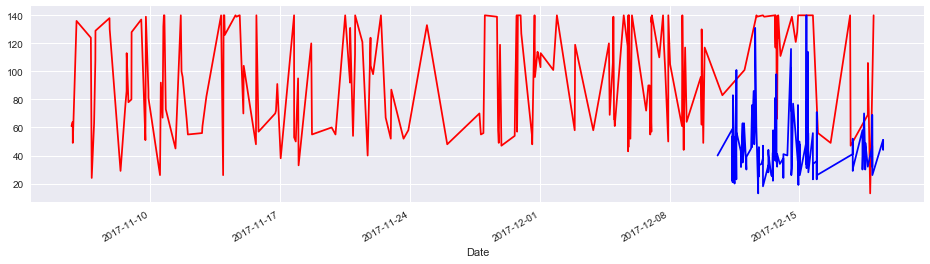

In [45]:
tlen_a.plot(figsize=(16,4), color='r');
tlen_b.plot(figsize=(16,4), color='b');

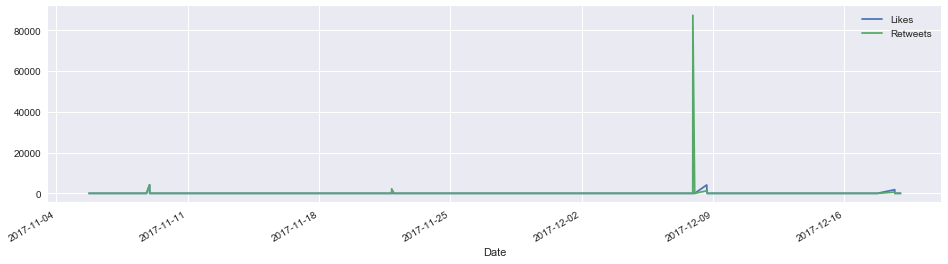

In [46]:
tfav_a.plot(figsize=(16,4), label="Likes", legend=True)
tret_a.plot(figsize=(16,4), label="Retweets", legend=True);

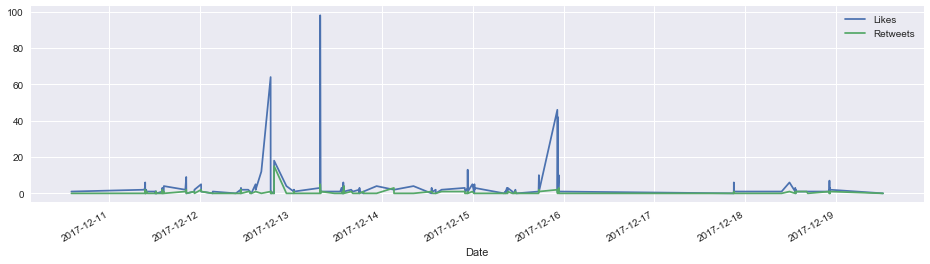

In [47]:
tfav_b.plot(figsize=(16,4), label="Likes", legend=True)
tret_b.plot(figsize=(16,4), label="Retweets", legend=True);

In [48]:
# sentiment analysis
a['SA'] = np.array([ analyze_sentiment(tweet) for tweet in a['Tweets'] ])
b['SA'] = np.array([ analyze_sentiment(tweet) for tweet in b['Tweets'] ])

In [49]:
pos_tweets_a = [ tweet for index, tweet in enumerate(a['Tweets']) if a['SA'][index] > 0]
neu_tweets_a = [ tweet for index, tweet in enumerate(a['Tweets']) if a['SA'][index] == 0]
neg_tweets_a = [ tweet for index, tweet in enumerate(a['Tweets']) if a['SA'][index] < 0]

pos_tweets_b = [ tweet for index, tweet in enumerate(b['Tweets']) if b['SA'][index] > 0]
neu_tweets_b = [ tweet for index, tweet in enumerate(b['Tweets']) if b['SA'][index] == 0]
neg_tweets_b = [ tweet for index, tweet in enumerate(b['Tweets']) if b['SA'][index] < 0]

In [53]:
print("For Brand A (Nike):")
print("Percentage of positive tweets: {}%".format(len(pos_tweets_a)*100/len(a['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets_a)*100/len(a['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets_a)*100/len(a['Tweets'])))


print("\nFor Brand B (Adidas):")
print("Percentage of positive tweets: {}%".format(len(pos_tweets_b)*100/len(b['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets_b)*100/len(b['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets_b)*100/len(b['Tweets'])))

For Brand A (Nike):
Percentage of positive tweets: 40.0%
Percentage of neutral tweets: 52.5%
Percentage of negative tweets: 7.5%

For Brand B (Adidas):
Percentage of positive tweets: 37.0%
Percentage of neutral tweets: 60.0%
Percentage of negative tweets: 3.0%


    Findings: 
        Based on sentiment analysis, you get more or less the same (rounded up) %tage of positive (~40%) for both brands.

## Exercise 7

Write a function to return if a tweet is more objective or subjective and run it in all the examples of the previous exercises (plus the Trump example we made during the class)

In [ ]:
blob = TextBlob(text)
sent = blob.sentiment

In [ ]:
def clean_tweet(tweet): # gets rid of urls, @, substitute it with blank space
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet): # pass the clean_tweet, then analyze text
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.subjectivity > 0:
        return "subjective"
    elif analysis.sentiment.subjectivity == 0:
        return "objective"
    else:
        return 0

In [ ]:
# We create a column with the result of the analysis:
data['Subjectivity'] = np.array([ analyze_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))